In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size']  = 15

In [4]:
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.linear_model import Ridge  # 岭回归
from sklearn.linear_model import Lasso  # 套索回归

from sklearn.model_selection import train_test_split # 划分数据集
from sklearn.model_selection import cross_val_score # 交叉验证平分函数

In [3]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
data = pd.DataFrame(dataset.data,columns = dataset.feature_names)
data.columns = [
    '住户收入的中位数', '房屋年龄的中位数', '平均房间数据', '平均卧室数目',
    '街区的人口', '平均入住率', '纬度', '经度'
]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    dataset.target,
    test_size=0.3,
    random_state=1210
)

In [5]:
#使用岭回归进行建模
reg = Ridge(alpha=10)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6130616899864443

In [32]:
alpharange = np.arange(1,1001,20)
ridge,lr = [],[]
liner = LinearRegression()
liners = cross_val_score(liner,X_train,y_train,cv=5,scoring='r2').mean()

In [17]:
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    regs = cross_val_score(reg,X_train,y_train,cv=5,scoring='r2').mean()
    ridge.append(regs)
    lr.append(liners)

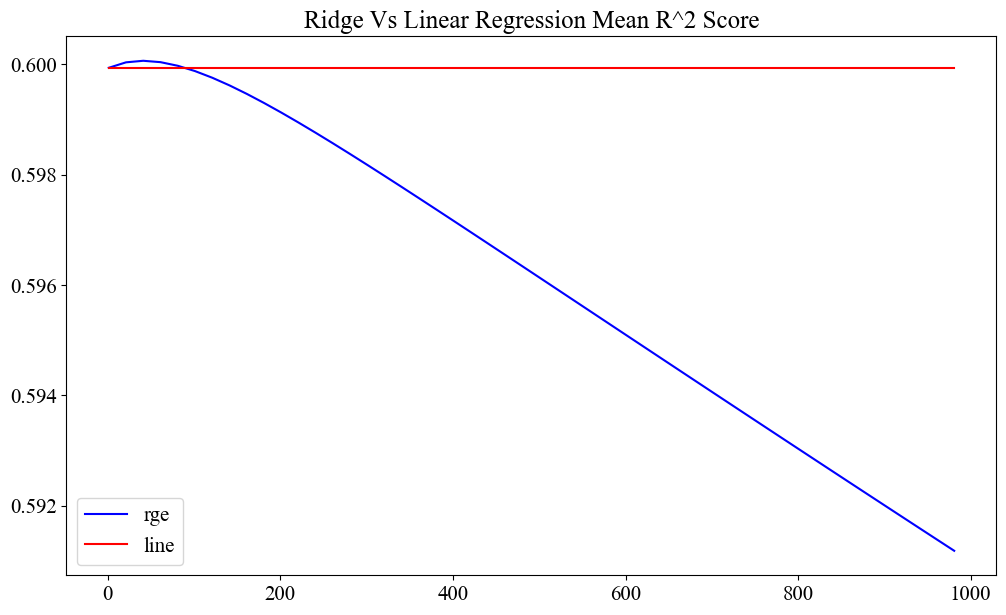

In [19]:
plt.figure(figsize=(12,7))
plt.plot(alpharange,ridge,color='blue',label = 'rge')
plt.plot(alpharange,lr,color='red',label = 'line')
plt.title('Ridge Vs Linear Regression Mean R^2 Score')
plt.legend()
plt.show()

In [21]:
alpharange = np.arange(1,100,5)
ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    regs = cross_val_score(reg,X_train,y_train,cv=5,scoring='r2').mean()
    ridge.append(regs)
    lr.append(liners)


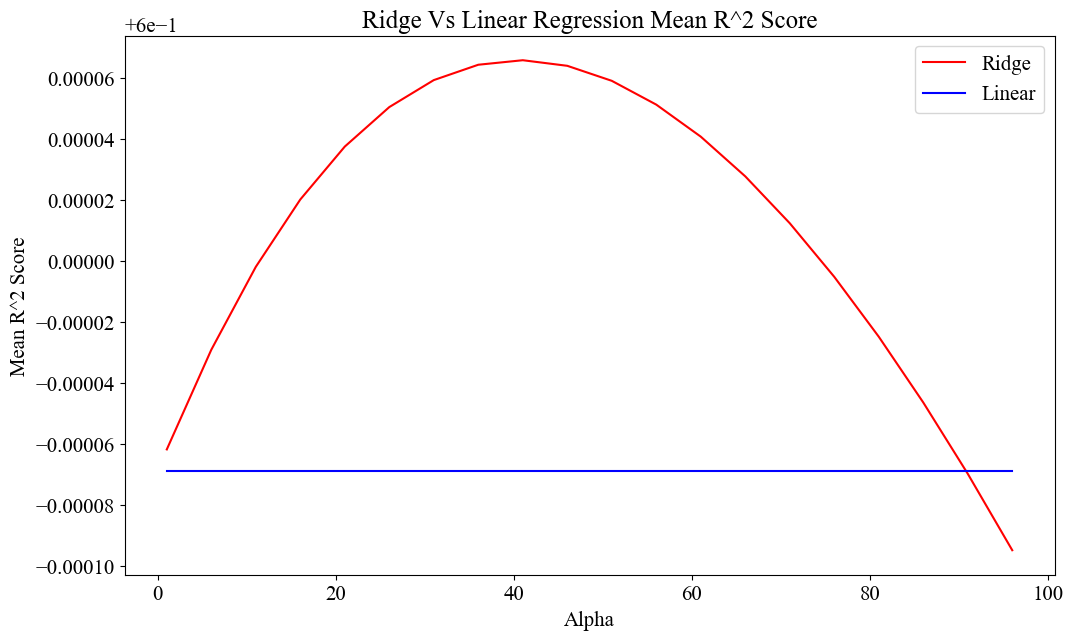

In [22]:
plt.figure(figsize=(12,7), dpi=100)

plt.plot(alpharange, ridge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='blue', label='Linear')
plt.title('Ridge Vs Linear Regression Mean R^2 Score')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.legend()
plt.show()

In [34]:
print(liner)

LinearRegression()


In [35]:
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    regs = cross_val_score(reg,X_train,y_train,cv=5,scoring='r2').var()
    liners1 = cross_val_score(liner,X_train,y_train,cv=5,scoring='r2').var()
    ridge.append(regs)
    lr.append(liners1)


In [26]:
ridge

[0.00011169339123636103,
 8.430131490300335e-05,
 7.528146102853071e-05,
 7.147994294194092e-05,
 6.973102290664388e-05,
 6.896581542112193e-05,
 6.873303608204891e-05,
 6.881013188472895e-05,
 6.907446869269679e-05,
 6.945281743706901e-05]

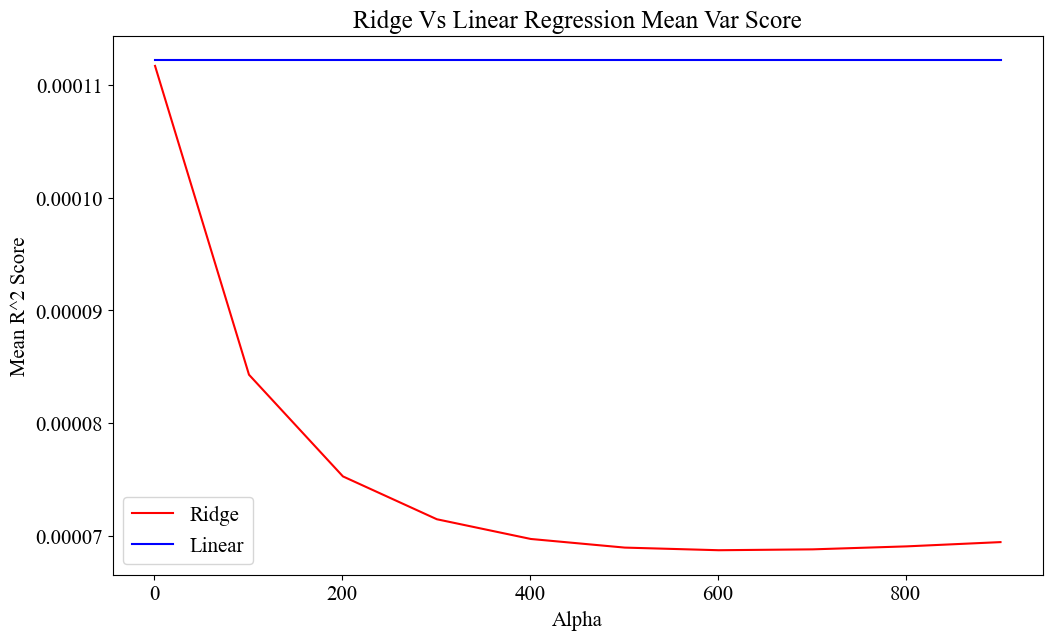

In [36]:
plt.figure(figsize=(12,7), dpi=100)

plt.plot(alpharange, ridge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='blue', label='Linear')
plt.title('Ridge Vs Linear Regression Mean Var Score')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.legend()
plt.show()

In [37]:
raw_df = pd.read_csv('./data/boston.txt', sep=r'\s+', skiprows=22, header = None)
X = np.hstack([raw_df.values[::2,:], raw_df.values[1::2,:2]])#用于沿水平反向拼接数组
y = raw_df.values[1::2, 2]                                                      

In [42]:
raw_df.shape

(1012, 11)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1210)

In [47]:
alpharange = np.arange(1,1001,100)
redge,lr = [],[]
liners = cross_val_score(liner,X,y,cv=5,scoring='r2').mean()

In [60]:
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean()  
    if regs == 0.4979673976371745:
        print(alpha)
    redge.append(regs)
    lr.append(liners)

201


list

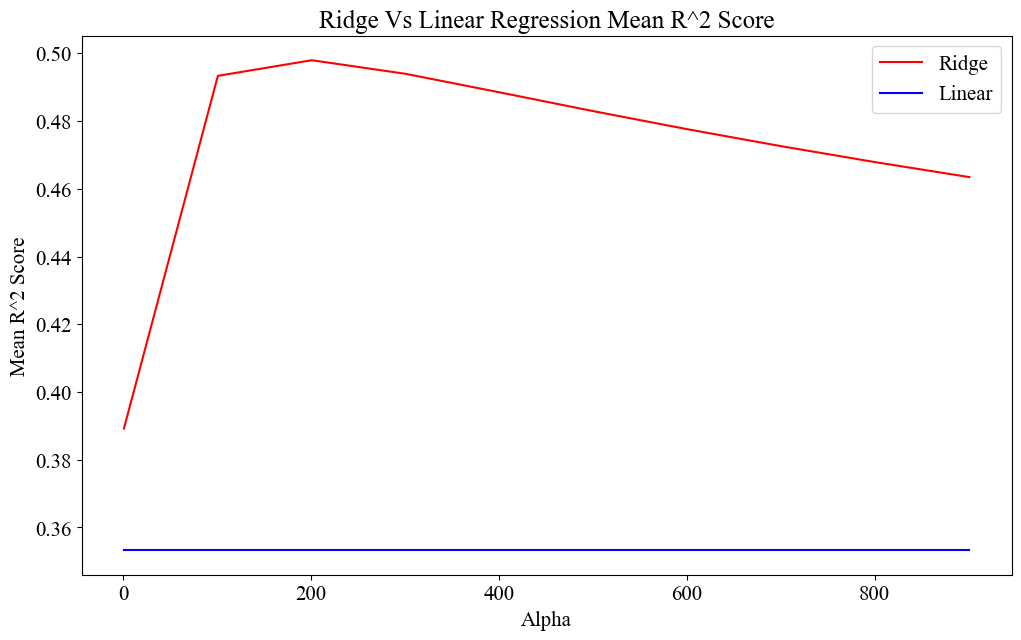

In [58]:

plt.figure(figsize=(12,7), dpi=100)

plt.plot(alpharange, redge, color='red', label='Ridge')
plt.plot(alpharange, lr, color='blue', label='Linear')
plt.title('Ridge Vs Linear Regression Mean R^2 Score')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import RidgeCV

In [6]:
from sklearn.linear_model import RidgeCV
data = pd.read_csv('./data/housevalue.csv',encoding='utf-8')
data.columns = [
    '住户收入的中位数', '房屋年龄的中位数', '平均房间数据', '平均卧室数目',
    '街区的人口', '平均入住率', '纬度', '经度','房屋的价格'
]

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
Xtrain,Xtest,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1210,
)

In [90]:
X.shape

(20640, 8)

In [91]:
y.shape

(20640,)

In [7]:
Ridge_ = RidgeCV(alphas=np.arange(1,200,10),
                store_cv_results=True, # 存储交叉验证的数据
#                  cv=5,  # 这个和store_cv_vcalues二选一,即可
                )
Ridge_.fit(X,y)
Ridge_.alpha_

101

In [8]:
Ridge_.cv_results_#查看每一次交叉验证的结果

array([[0.1557472 , 0.15655173, 0.1573369 , ..., 0.16726538, 0.16782902,
        0.16838285],
       [0.15334566, 0.15172952, 0.15016487, ..., 0.131436  , 0.13043084,
        0.12944919],
       [0.02429857, 0.02496917, 0.02562658, ..., 0.03403708, 0.03451094,
        0.03497518],
       ...,
       [0.56545783, 0.56340626, 0.56136668, ..., 0.53212345, 0.53025871,
        0.52840398],
       [0.27883123, 0.27789001, 0.27694331, ..., 0.26238283, 0.26140314,
        0.26042374],
       [0.14313527, 0.1428605 , 0.14256745, ..., 0.13656401, 0.13608699,
        0.13560332]])

In [10]:
cv_means = Ridge_.cv_results_.mean(axis=1)

In [11]:
cv_means.shape

(20640,)

In [12]:
Ridge_.cv_results_.shape

(20640, 20)

In [16]:
reg = LinearRegression().fit(Xtrain, y_train)
(reg.coef_ * 100 ).tolist()

[42.821728059801984,
 0.9912543668054621,
 -9.710408030070312,
 57.83599085896151,
 -0.0003172373968497548,
 -0.3225749608536443,
 -42.40043923097046,
 -43.67783265173476]

In [18]:
ridge = Ridge(alpha=0.01).fit(Xtrain, y_train)
(ridge.coef_ * 100).tolist()

[42.82160522858443,
 0.9912566701982591,
 -9.710171059757348,
 57.83476254421276,
 -0.00031722636160977087,
 -0.32257470966108187,
 -42.40040991746895,
 -43.67778592215654]

In [21]:
lasso = Lasso(alpha=10**10).fit(Xtrain, y_train)
(lasso.coef_ * 100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

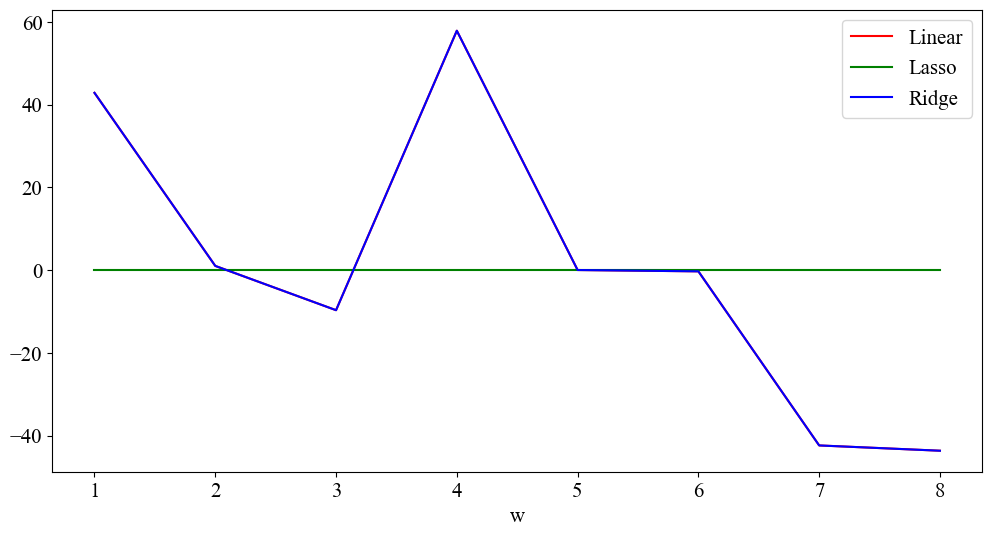

In [22]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(range(1,9),(reg.coef_*100), color='red', label='Linear')
plt.plot(range(1,9),(lasso.coef_*100), color='green', label='Lasso')
plt.plot(range(1,9), (ridge.coef_ * 100), color='blue', label ='Ridge')

plt.xlabel('w')
plt.legend()
plt.show()